In [32]:
import numpy as np
import json
from Bio.PDB import MMCIFParser
from collections import defaultdict


# Load the JSON file
with open("fold_mll4_1100_end_rbbp5_wdr5_p53x2/fold_mll4_1100_end_rbbp5_wdr5_p53x2_full_data_0.json", "r") as file:
    pae_data = json.load(file)
    
cif_file_path = "fold_mll4_1100_end_rbbp5_wdr5_p53x2/fold_mll4_1100_end_rbbp5_wdr5_p53x2_model_0.cif"
atom_plddts = pae_data['atom_plddts']
atom_chain_ids = pae_data['atom_chain_ids']
token_res_ids = pae_data['token_res_ids']

# Parse the CIF file
parser = MMCIFParser(QUIET=True)
structure = parser.get_structure("model", cif_file_path)

# Map atoms to residues
residue_plddt_sum = defaultdict(float)
residue_atom_count = defaultdict(int)

atom_index = 0  # Track atom index for atom_plddts

for model in structure:
    for chain in model:
        for residue in chain:
            residue_key = (chain.id, residue.id[1])  # Use (chain ID, residue number) as key
            
            for atom in residue:
                if atom_index < len(atom_plddts):
                    residue_plddt_sum[residue_key] += atom_plddts[atom_index]
                    residue_atom_count[residue_key] += 1
                    atom_index += 1
                else:
                    print(f"Warning: atom_index {atom_index} exceeds atom_plddts length.")
                    break

# Calculate average plDDT for each residue
average_residue_plddt = {
    key: residue_plddt_sum[key] / residue_atom_count[key]
    for key in residue_plddt_sum
}
# # Output the results
# for residue_key, avg_plddt in average_residue_plddt.items():
#     chain_id, residue_id = residue_key
#     print(f"Chain {chain_id}, Residue {residue_id}: Average plDDT = {avg_plddt:.2f}")
len(average_residue_plddt)

1815

In [33]:
#pae data is a dictionary
[*pae_data]

['atom_chain_ids',
 'atom_plddts',
 'contact_probs',
 'pae',
 'token_chain_ids',
 'token_res_ids']

In [34]:
#pae_data['atom_chain_ids']
#print(pae_data['token_res_ids'])

print(len(pae_data['token_res_ids']))
pae_data['token_res_ids'].count(1)

#pae_data['atom_chain_ids']


1815


5

In [35]:
#pae data is a dictionary with the keys:
# ['atom_chain_ids',
#  'atom_plddts',
#  'contact_probs',
#  'pae',
#  'token_chain_ids',
#  'token_res_ids']
len(pae_data['pae'])
#each value is a list

1815

<function matplotlib.pyplot.show(close=None, block=None)>

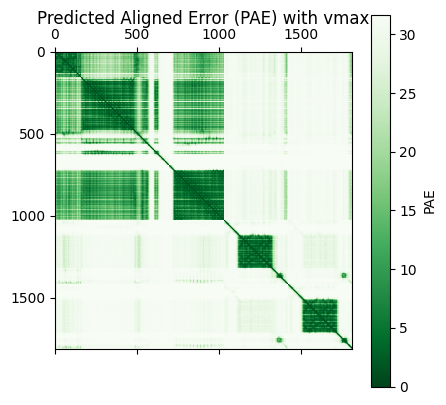

In [36]:
pae_data['pae'][0]
# col or row? does it matter?
#pae_data['pae'] is a square list of lists
len(pae_data['pae'][0])
pae_as_arr = np.array(pae_data['pae'])
import matplotlib.pyplot as plt

# plt.matshow(pae_as_arr)
# plt.show()
#pae_as_arr.imshow(norm = matplotlib.colors.Normalize(vmin=None, vmax=None, clip=False))
pae_data['pae'][1814]
# plt.matshow(pae_as_arr, cmap='Greens_r')  # Use 'Greens' colormap
# plt.colorbar(label='PAE')  # Add a colorbar for reference
# plt.title("Predicted Aligned Error (PAE) without vmax", pad=20)
# plt.show

plt.matshow(pae_as_arr,vmin=0., vmax=np.max(pae_as_arr), cmap='Greens_r')  # Use 'Greens' colormap
plt.colorbar(label='PAE')  # Add a colorbar for reference
plt.title("Predicted Aligned Error (PAE) with vmax", pad=20)
plt.show


In [37]:
#np.mean(pae_as_arr)
print(np.mean(pae_as_arr))
print(pae_as_arr[0,1500])
print(pae_as_arr[1500,1000])


25.435213259567895
31.4
31.7


In [27]:
type(pae_as_arr[0][0])

numpy.float64

<function matplotlib.pyplot.show(close=None, block=None)>

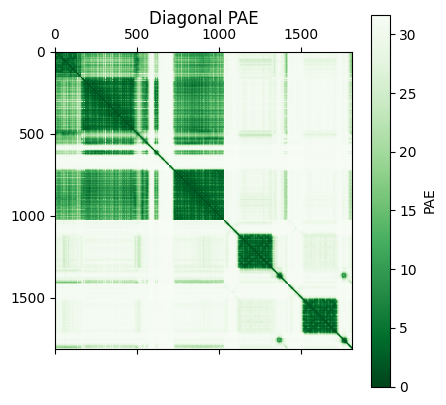

In [28]:
#trying laplcian
diagonal_pae = np.minimum(pae_as_arr, pae_as_arr.T)

plt.matshow(diagonal_pae,vmin=0., vmax=np.max(diagonal_pae), cmap='Greens_r')  # Use 'Greens' colormap
plt.colorbar(label='PAE')  # Add a colorbar for reference
plt.title("Diagonal PAE", pad=20)
plt.show

In [29]:

def plot_distribution(data, bins=10, title="Distribution Graph", xlabel="Value", ylabel="Frequency"):
    """
    Plots a distribution graph for the given list of numbers.

    Parameters:
        data (list): List of numbers between 0-100.
        bins (int): Number of bins for the histogram (default is 10).
        title (str): Title of the graph.
        xlabel (str): Label for the x-axis.
        ylabel (str): Label for the y-axis.
    """
    # Validate the input data
    if not all(0 <= x <= 100 for x in data):
        raise ValueError("All numbers in the list must be between 0 and 100.")

    # Plot the histogram
    plt.figure(figsize=(8, 6))
    plt.hist(data, bins=bins, range=(0, 100), color='skyblue', edgecolor='black', alpha=0.7)

    # Add title and labels
    plt.title(title, fontsize=16)
    plt.xlabel(xlabel, fontsize=14)
    plt.ylabel(ylabel, fontsize=14)

    # Show the grid and plot
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.tight_layout()
    plt.show()


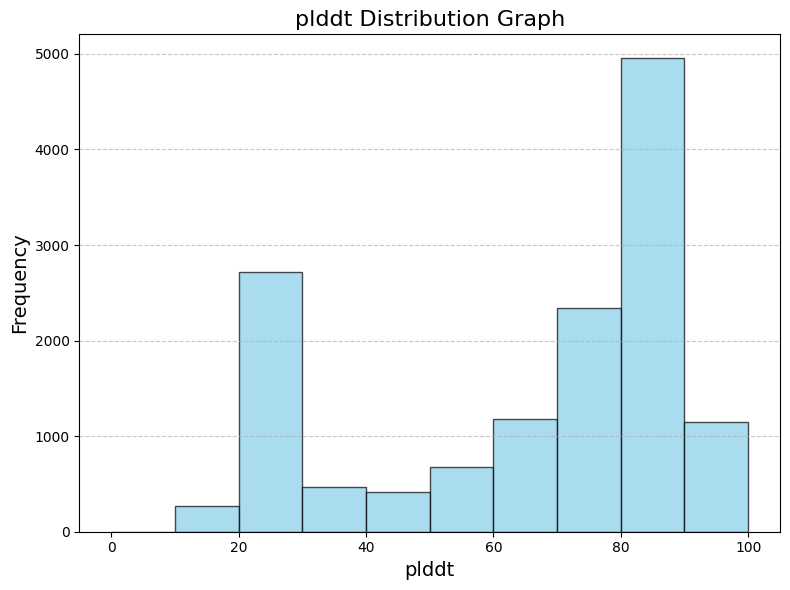

In [30]:
len(pae_data['atom_plddts'])
pae_data['atom_plddts']
plot_distribution(pae_data['atom_plddts'], bins=10, title="plddt Distribution Graph", xlabel="plddt", ylabel="Frequency")

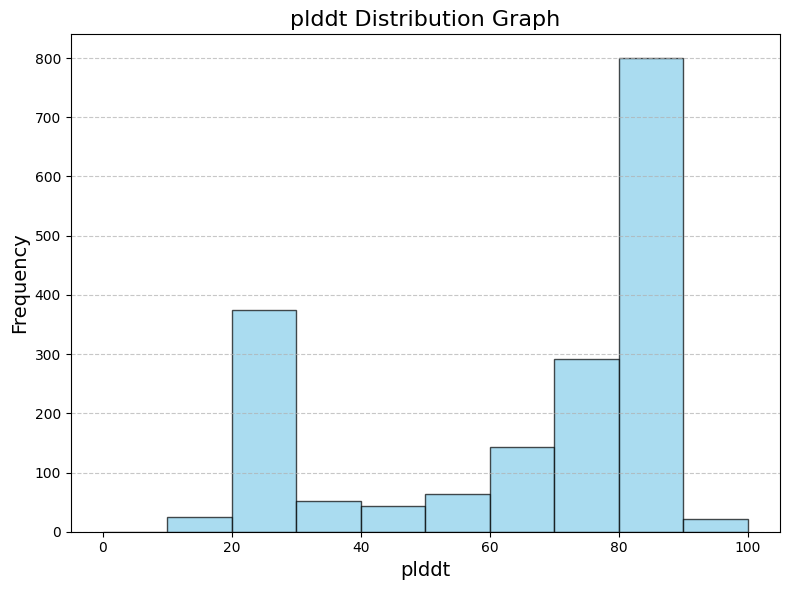

In [88]:


# Assuming 'average_residue_plddt' and 'pae_as_arr' are already defined
# Convert average_residue_plddt to a list in the correct order
plddt_values = [average_residue_plddt[(chain_id, res_id)] for chain_id, res_id in average_residue_plddt]

plot_distribution(plddt_values, bins=10, title="plddt Distribution Graph", xlabel="plddt", ylabel="Frequency")



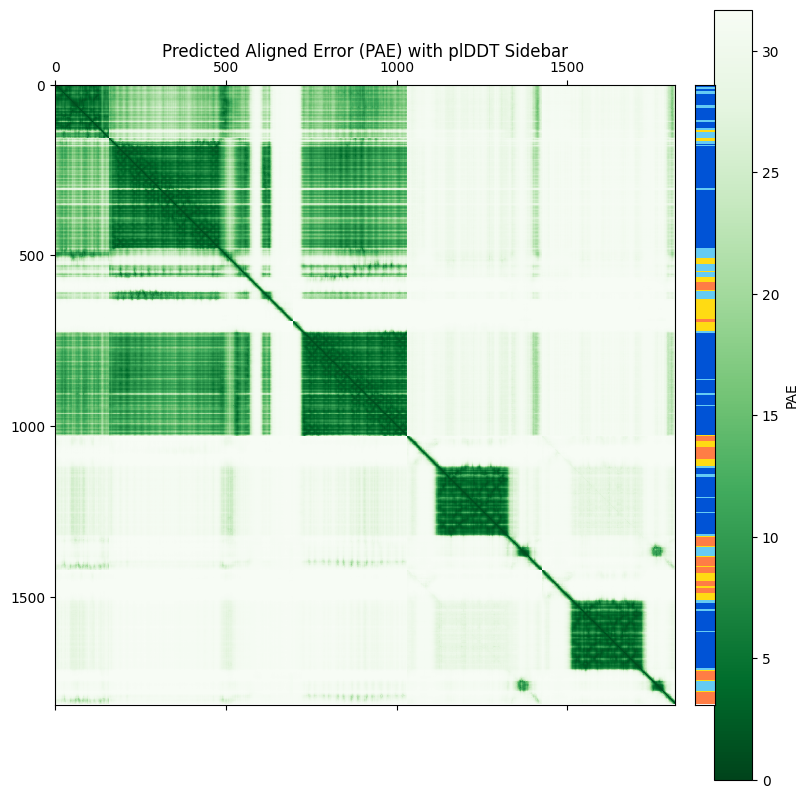

In [45]:
from matplotlib.colors import ListedColormap

# Define AlphaFold plDDT color scheme
plddt_cmap = ListedColormap(['#FF7D45', '#FFDB13', '#65CBF3', '#0053D6'])  # Orange, Yellow, Cyan, Blue
bounds = [0, 50, 70, 90, 100]
norm = plt.Normalize(vmin=0, vmax=100)

# Assuming 'average_residue_plddt' and 'pae_as_arr' are already defined
# Convert average_residue_plddt to a list in the correct order
plddt_values = [average_residue_plddt[key] for key in sorted(average_residue_plddt)]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))
matrix_ax = ax.matshow(pae_as_arr, vmin=0., vmax=np.max(pae_as_arr), cmap='Greens_r')
fig.colorbar(matrix_ax, label='PAE', ax=ax)

# Add a vertical color bar for plDDT
divider_width = 0.02
divider_offset = 0.02
cb_ax = fig.add_axes([
    ax.get_position().x1 + divider_offset,  # Position to the right of the matrix
    ax.get_position().y0,
    divider_width,
    ax.get_position().height
])

# Plot the plDDT color bar
cb_ax.imshow(
    np.array(plddt_values).reshape(-1, 1),
    aspect='auto',
    cmap=plddt_cmap,
    norm=norm
)
cb_ax.set_xticks([])  # Remove x-axis ticks
cb_ax.set_yticks([])  # Remove y-axis ticks

# Add titles and labels
ax.set_title("Predicted Aligned Error (PAE) with plDDT Sidebar", pad=20)

# Show the plot
plt.show()

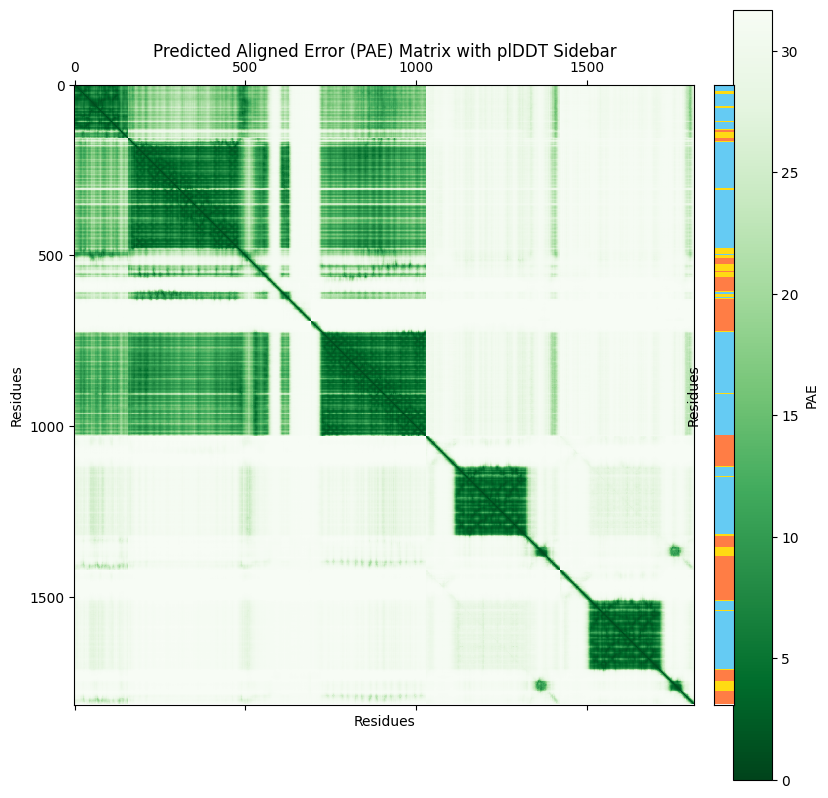

In [46]:
from matplotlib.colors import BoundaryNorm, ListedColormap

# Define AlphaFold plDDT color scheme
plddt_cmap = ListedColormap(['#FF7D45', '#FFDB13', '#65CBF3', '#0053D6'])  # Orange, Yellow, Cyan, Blue
bounds = [0, 50, 70, 90, 100]  # Define confidence levels
norm = BoundaryNorm(bounds, plddt_cmap.N)  # Use BoundaryNorm for discrete segments

# Assuming 'average_residue_plddt' and 'pae_as_arr' are already defined
# Convert average_residue_plddt to a list in the correct order
plddt_values = [average_residue_plddt[key] for key in sorted(average_residue_plddt)]

# Create the figure and axes
fig, ax = plt.subplots(figsize=(10, 10))
matrix_ax = ax.matshow(pae_as_arr, vmin=0., vmax=np.max(pae_as_arr), cmap='Greens_r')
fig.colorbar(matrix_ax, label='PAE', ax=ax)

# Add a vertical color bar for plDDT
divider_width = 0.02
divider_offset = 0.02
cb_ax = fig.add_axes([
    ax.get_position().x1 + divider_offset,  # Position to the right of the matrix
    ax.get_position().y0,
    divider_width,
    ax.get_position().height
])

# Plot the plDDT color bar with correct colors
cb_ax.imshow(
    np.array(plddt_values).reshape(-1, 1),
    aspect='auto',
    cmap=plddt_cmap,
    norm=norm
)
cb_ax.set_xticks([])  # Remove x-axis ticks
cb_ax.set_yticks([])  # Remove y-axis ticks
cb_ax.set_ylabel('Residues', labelpad=10)

# Add titles and labels
ax.set_title("Predicted Aligned Error (PAE) with plDDT Sidebar", pad=20)


# Show the plot
plt.show()

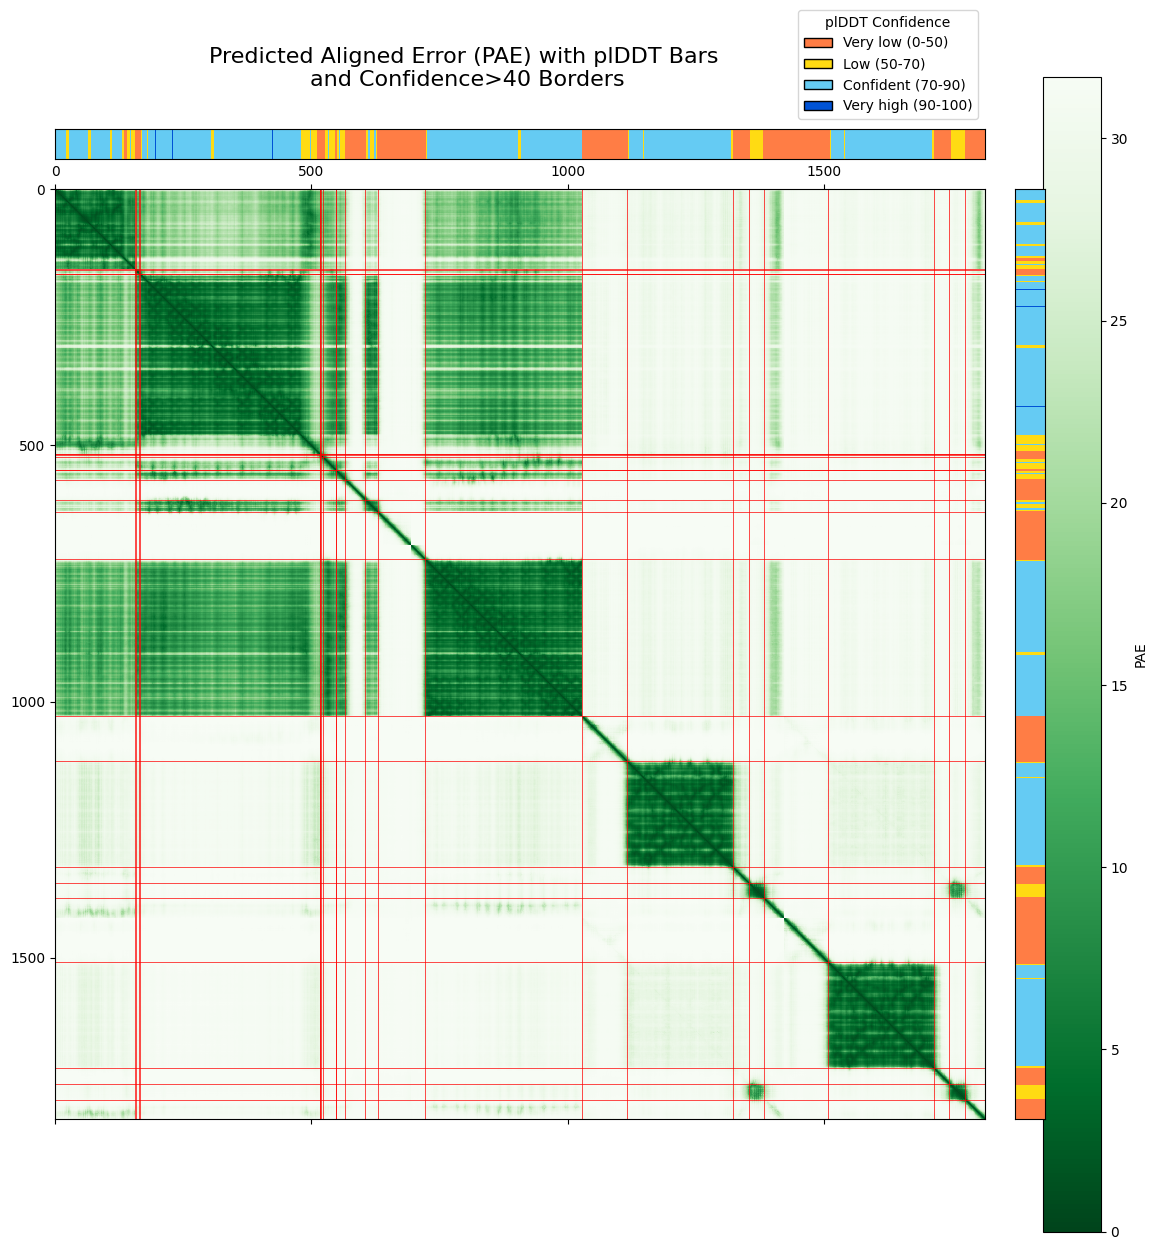

In [87]:
from matplotlib.colors import BoundaryNorm, ListedColormap
from matplotlib.patches import Patch

# Define AlphaFold plDDT color scheme
plddt_cmap = ListedColormap(['#FF7D45', '#FFDB13', '#65CBF3', '#0053D6'])  # Orange, Yellow, Cyan, Blue
bounds = [0, 50, 70, 90, 100]  # Define confidence levels
norm = BoundaryNorm(bounds, plddt_cmap.N)  # Use BoundaryNorm for discrete segments

# Assuming 'average_residue_plddt' and 'pae_as_arr' are already defined
# Convert average_residue_plddt to a list in the correct order
plddt_values = [average_residue_plddt[key] for key in sorted(average_residue_plddt)]
plddt_array = np.array(plddt_values)

# Identify start and end of continuous blocks where plDDT > 40
high_confidence = np.where(plddt_array > 40, 1, 0)
borders = np.diff(np.concatenate([[0], high_confidence, [0]]))
start_indices = np.where(borders == 1)[0]
end_indices = np.where(borders == -1)[0] - 1

# Create the figure and axes
fig, ax = plt.subplots(figsize=(15, 15))
matrix_ax = ax.matshow(pae_as_arr, vmin=0., vmax=np.max(pae_as_arr), cmap='Greens_r')
fig.colorbar(matrix_ax, label='PAE', ax=ax)

# Add plDDT bars to X and Y axes
divider_width = 0.02
divider_offset = 0.02

# plDDT bar for X-axis
x_cb_ax = fig.add_axes([
    ax.get_position().x0,
    ax.get_position().y1 + divider_offset,  # Position above the matrix
    ax.get_position().width,
    divider_width
])
x_cb_ax.imshow(
    plddt_array.reshape(1, -1),
    aspect='auto',
    cmap=plddt_cmap,
    norm=norm
)
x_cb_ax.set_xticks([])
x_cb_ax.set_yticks([])

# plDDT bar for Y-axis
y_cb_ax = fig.add_axes([
    ax.get_position().x1 + divider_offset,  # Position to the right of the matrix
    ax.get_position().y0,
    divider_width,
    ax.get_position().height
])
y_cb_ax.imshow(
    plddt_array.reshape(-1, 1),
    aspect='auto',
    cmap=plddt_cmap,
    norm=norm
)
y_cb_ax.set_xticks([])
y_cb_ax.set_yticks([])

# Draw border lines for high confidence regions
for start, end in zip(start_indices, end_indices):
    ax.axhline(start - 0.5, color='red', linestyle='-', linewidth=0.5)  # Top border
    ax.axhline(end + 0.5, color='red', linestyle='-', linewidth=0.5)    # Bottom border
    ax.axvline(start - 0.5, color='red', linestyle='-', linewidth=0.5)  # Left border
    ax.axvline(end + 0.5, color='red', linestyle='-', linewidth=0.5)    # Right border

# Add a plDDT legend
legend_elements = [
    Patch(facecolor='#FF7D45', edgecolor='black', label='Very low (0-50)'),
    Patch(facecolor='#FFDB13', edgecolor='black', label='Low (50-70)'),
    Patch(facecolor='#65CBF3', edgecolor='black', label='Confident (70-90)'),
    Patch(facecolor='#0053D6', edgecolor='black', label='Very high (90-100)')
]
ax.legend(
    handles=legend_elements,
    loc='best',  # Position the legend above the plot
    bbox_to_anchor=(1,1.2),  # Center above the plot with some padding
    title="plDDT Confidence",
    frameon=True
)

# Add title above the entire plot
fig.suptitle("Predicted Aligned Error (PAE) with plDDT Bars \nand Confidence>40 Borders", fontsize=16, x=0.4,y=0.9)

# Show the plot
plt.show()